<a href="https://colab.research.google.com/github/gpdsec/Beer_Review_Prediction/blob/master/BeerReview_data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Importing Libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Testing Data

In [0]:
Df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Input/train.csv')

In [21]:
Df.columns

Index(['index', 'beer/ABV', 'beer/beerId', 'beer/brewerId', 'beer/name',
       'beer/style', 'review/appearance', 'review/aroma', 'review/overall',
       'review/palate', 'review/taste', 'review/text', 'review/timeStruct',
       'review/timeUnix', 'user/ageInSeconds', 'user/birthdayRaw',
       'user/birthdayUnix', 'user/gender', 'user/profileName'],
      dtype='object')

In [22]:
print('data types of columns')
Df.dtypes

data types of columns


index                  int64
beer/ABV             float64
beer/beerId            int64
beer/brewerId          int64
beer/name             object
beer/style            object
review/appearance    float64
review/aroma         float64
review/overall       float64
review/palate        float64
review/taste         float64
review/text           object
review/timeStruct     object
review/timeUnix        int64
user/ageInSeconds    float64
user/birthdayRaw      object
user/birthdayUnix    float64
user/gender           object
user/profileName      object
dtype: object

In [23]:
print("column info")
Df.info()

column info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              37500 non-null  int64  
 1   beer/ABV           37500 non-null  float64
 2   beer/beerId        37500 non-null  int64  
 3   beer/brewerId      37500 non-null  int64  
 4   beer/name          37500 non-null  object 
 5   beer/style         37500 non-null  object 
 6   review/appearance  37500 non-null  float64
 7   review/aroma       37500 non-null  float64
 8   review/overall     37500 non-null  float64
 9   review/palate      37500 non-null  float64
 10  review/taste       37500 non-null  float64
 11  review/text        37490 non-null  object 
 12  review/timeStruct  37500 non-null  object 
 13  review/timeUnix    37500 non-null  int64  
 14  user/ageInSeconds  7856 non-null   float64
 15  user/birthdayRaw   7856 non-null   object 
 16  user/birth

In [24]:
print("Describing Data")
Df.describe()

Describing Data


,index,beer/ABV,beer/beerId,beer/brewerId,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/timeUnix,user/ageInSeconds,user/birthdayUnix
count,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000,37500.00000,37500.000000,37500.000000,3.750000e+04,7.856000e+03,7.856000e+03
mean,24951.887573,7.403725,21861.152027,3036.595120,3.900053,3.873240,3.88944,3.854867,3.922440,1.232794e+09,1.176705e+09,2.416303e+08
std,14434.009669,2.318145,18923.130832,5123.084675,0.588778,0.680865,0.70045,0.668068,0.716504,7.190955e+07,3.375514e+08,3.375514e+08
min,0.000000,0.100000,175.000000,1.000000,0.000000,1.000000,0.00000,1.000000,1.000000,9.262944e+08,7.034366e+08,-2.208960e+09
25%,12422.500000,5.400000,5441.000000,395.000000,3.500000,3.500000,3.50000,3.500000,3.500000,1.189194e+09,9.794810e+08,1.433628e+08
50%,24942.500000,6.900000,17538.000000,1199.000000,4.000000,4.000000,4.00000,4.000000,4.000000,1.248150e+09,1.100009e+09,3.183264e+08
75%,37416.750000,9.400000,34146.000000,1315.000000,4.500000,4.500000,4.50000,4.500000,4.500000,1.291330e+09,1.274973e+09,4.388544e+08
max,49999.000000,57.700000,77207.000000,27797.000000,5.000000,5.000000,5.00000,5.000000,5.000000,1.326267e+09,3.627295e+09,7.148988e+08


## 2. Testing uniqueness of different collums

In [25]:
print('Number of unique beerID :', Df['beer/beerId'].nunique())
print('Number of unique beerName:', Df['beer/name'].nunique())
print('Number of unique beer/ABV:', Df['beer/ABV'].nunique())
print("Number of unique beer/brewerId", Df['beer/brewerId'].nunique())
print("Number of unique beer/style", Df['beer/style'].nunique())
print("Number of unique user/profileName", Df['user/profileName'].nunique())
print("Number of unique review/timeUnix", Df['review/timeUnix'].nunique())
print("Number of unique review/timeStruct", Df['review/timeStruct'].nunique())
print("Number of unique index", Df['index'].nunique())

Number of unique beerID : 1731
Number of unique beerName: 1688
Number of unique beer/ABV: 126
Number of unique beer/brewerId 212
Number of unique beer/style 95
Number of unique user/profileName 7441
Number of unique review/timeUnix 37490
Number of unique review/timeStruct 37490
Number of unique index 37500


In [26]:
Df.nunique()

index                37500
beer/ABV               126
beer/beerId           1731
beer/brewerId          212
beer/name             1688
beer/style              95
review/appearance       10
review/aroma             9
review/overall          10
review/palate            9
review/taste             9
review/text          37482
review/timeStruct    37490
review/timeUnix      37490
user/ageInSeconds     1471
user/birthdayRaw      1432
user/birthdayUnix     1432
user/gender              2
user/profileName      7441
dtype: int64

In [27]:
Df.groupby('review/overall').mean()

,index,beer/ABV,beer/beerId,beer/brewerId,review/appearance,review/aroma,review/palate,review/taste,review/timeUnix,user/ageInSeconds,user/birthdayUnix
review/overall,,,,,,,,,,,
0.0,38159.000000,4.000000,3806.000000,1413.000000,0.000000,2.000000,3.000000,2.000000,1.030198e+09,NaN,NaN
1.0,22443.511364,6.462500,21444.255682,3438.306818,2.735795,2.065341,1.863636,1.440341,1.222555e+09,1.180056e+09,2.382796e+08
1.5,20023.161290,6.189435,20679.633065,3684.088710,2.909274,2.264113,2.185484,1.786290,1.214552e+09,1.184613e+09,2.337226e+08
2.0,21007.814126,6.487534,23231.656753,4114.607187,3.094796,2.677819,2.561338,2.250929,1.221878e+09,1.205672e+09,2.126636e+08
2.5,23023.695725,6.622339,21662.948030,3544.916178,3.319363,3.024308,2.883906,2.738055,1.217723e+09,1.201719e+09,2.166165e+08
3.0,23933.799036,6.720078,23202.538415,3841.351913,3.505423,3.329165,3.246460,3.204278,1.227142e+09,1.201137e+09,2.171981e+08
3.5,24973.777286,7.048287,22518.899405,3372.138299,3.748512,3.663715,3.614868,3.655396,1.230920e+09,1.189076e+09,2.292599e+08
4.0,25353.281295,7.427285,21651.706014,3027.764710,3.952661,3.964270,3.954247,4.053324,1.233335e+09,1.179034e+09,2.393018e+08
4.5,25319.810408,7.863193,21202.240249,2563.342834,4.141646,4.218151,4.239557,4.381433,1.237492e+09,1.163868e+09,2.544677e+08


Here I am going to drop columns with to manny missing values or having more than half of column full of unique values.

In [0]:
cat_drop = ['index', 'review/timeStruct', 'review/timeUnix','user/ageInSeconds', 'user/birthdayRaw',
       'user/birthdayUnix', 'user/gender']
beer = Df.drop(cat_drop, axis=1, inplace=False)

In [29]:
beer.nunique()

beer/ABV               126
beer/beerId           1731
beer/brewerId          212
beer/name             1688
beer/style              95
review/appearance       10
review/aroma             9
review/overall          10
review/palate            9
review/taste             9
review/text          37482
user/profileName      7441
dtype: int64

In [30]:
beer.describe()

,beer/ABV,beer/beerId,beer/brewerId,review/appearance,review/aroma,review/overall,review/palate,review/taste
count,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000,37500.00000,37500.000000,37500.000000
mean,7.403725,21861.152027,3036.595120,3.900053,3.873240,3.88944,3.854867,3.922440
std,2.318145,18923.130832,5123.084675,0.588778,0.680865,0.70045,0.668068,0.716504
min,0.100000,175.000000,1.000000,0.000000,1.000000,0.00000,1.000000,1.000000
25%,5.400000,5441.000000,395.000000,3.500000,3.500000,3.50000,3.500000,3.500000
50%,6.900000,17538.000000,1199.000000,4.000000,4.000000,4.00000,4.000000,4.000000
75%,9.400000,34146.000000,1315.000000,4.500000,4.500000,4.50000,4.500000,4.500000
max,57.700000,77207.000000,27797.000000,5.000000,5.000000,5.00000,5.000000,5.000000


In [31]:
beer.groupby('review/overall').mean()

,beer/ABV,beer/beerId,beer/brewerId,review/appearance,review/aroma,review/palate,review/taste
review/overall,,,,,,,
0.0,4.000000,3806.000000,1413.000000,0.000000,2.000000,3.000000,2.000000
1.0,6.462500,21444.255682,3438.306818,2.735795,2.065341,1.863636,1.440341
1.5,6.189435,20679.633065,3684.088710,2.909274,2.264113,2.185484,1.786290
2.0,6.487534,23231.656753,4114.607187,3.094796,2.677819,2.561338,2.250929
2.5,6.622339,21662.948030,3544.916178,3.319363,3.024308,2.883906,2.738055
3.0,6.720078,23202.538415,3841.351913,3.505423,3.329165,3.246460,3.204278
3.5,7.048287,22518.899405,3372.138299,3.748512,3.663715,3.614868,3.655396
4.0,7.427285,21651.706014,3027.764710,3.952661,3.964270,3.954247,4.053324
4.5,7.863193,21202.240249,2563.342834,4.141646,4.218151,4.239557,4.381433


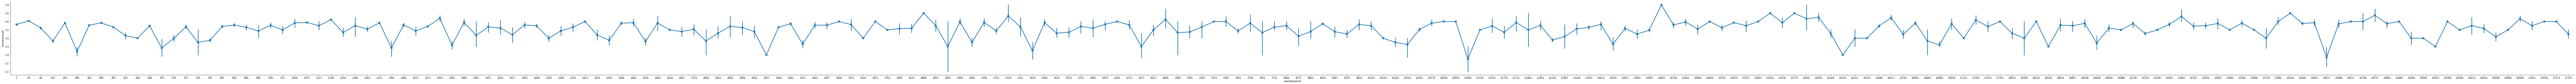

In [32]:
sns.catplot(x='beer/brewerId', y='review/overall', data=beer, kind='point', aspect=30)

I am droping beer/beerId, brewerid, beer/name and user/Profilename they were having no visible effect on review/overall are none.

In [0]:
cat_drop = ['beer/beerId','beer/name','user/profileName']
beer.drop(cat_drop, axis=1, inplace=True)

there is three possibilities 
1. disgarding review/text and developing classifier for review with remaining columns
2. It revolve arround developing two different model one model to predict sentiment of review/text which could be divided into trree different sub categeries bad(overall/review<2.5), neutral(2.5<overall/review<3.5) good(overall/review<3.5) which further used to develop classifier to predict overall/review
3. there is third possibility developing text classifier to predict overall/review by review/text itself.
*. if I have left sufficent time then we trying all three aproch and seeing which one better

In [0]:
beer.to_csv('/content/drive/My Drive/Colab Notebooks/Input/beer.csv', index=False)

In [40]:
beer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   beer/ABV           37500 non-null  float64
 1   beer/brewerId      37500 non-null  int64  
 2   beer/style         37500 non-null  object 
 3   review/appearance  37500 non-null  float64
 4   review/aroma       37500 non-null  float64
 5   review/overall     37500 non-null  float64
 6   review/palate      37500 non-null  float64
 7   review/taste       37500 non-null  float64
 8   review/text        37490 non-null  object 
dtypes: float64(6), int64(1), object(2)
memory usage: 2.6+ MB


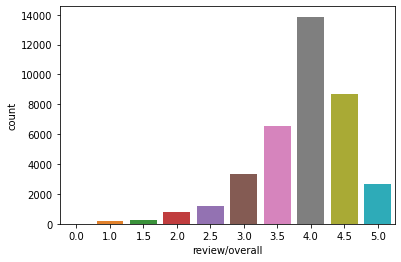

In [36]:
sns.countplot(beer['review/overall'])